# Spam Detection 

Library Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from nltk import word_tokenize
from sklearn.model_selection import train_test_split

Load Dataset

In [6]:
v1_field = "v1"
v2_field = "v2"

In [7]:
dataset_name = "spam.csv"
spam_df = pd.read_csv(dataset_name, encoding = "ISO-8859-1")
spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)
spam_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Visualization

Word Cloud

In [8]:
def visualize_word_cloud(documents, title, width, height):
    word_cloud = WordCloud(width = width, height = height)
    text_from_all_documents = " ".join(documents)
    word_cloud.generate(text_from_all_documents)

    plt.title(title)
    plt.axis("off")
    plt.imshow(word_cloud)

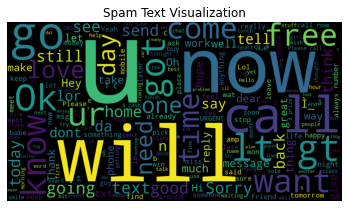

In [9]:
visualize_word_cloud(spam_df[v2_field], "Spam Text Visualization", 1500, 800)

Label Distribution

<AxesSubplot:xlabel='v1', ylabel='Count'>

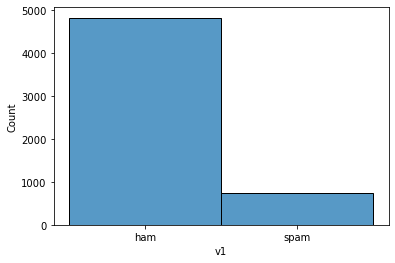

In [10]:
sns.histplot(spam_df[v1_field])

## Data Preprocessing

In [11]:
sms_texts = spam_df[v2_field]
label = spam_df[v1_field]

Remove All Punctuations

In [12]:
def get_removed_duplicated_space_in_string(my_string):
    return " ".join(my_string.split())

def get_erased_punctuations(text):
    list_of_punctuations = string.punctuation + '"‘'
    final_text = text
    
    for punc in list_of_punctuations:
        final_text = final_text.replace(punc, " ")
    
    final_text = get_removed_duplicated_space_in_string(final_text)
    
    return final_text

sms_texts_no_punc = [get_erased_punctuations(sms_text) for sms_text in sms_texts]
sms_texts_no_punc[:3]

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry question std txt rate T C s apply 08452810075over18 s']

Lowercase All Letters

In [13]:
def lowercase_letters(sentence):
    return sentence.lower()

sms_texts_lowercase = edgar_alian_poe_poem_lower_case = list(map(lowercase_letters, sms_texts_no_punc))
sms_texts_lowercase[:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though']

Re-apply the data into dataframe

In [14]:
applied_preprocessing_spam_df = spam_df.copy()
applied_preprocessing_spam_df[v2_field] = sms_texts_lowercase
applied_preprocessing_spam_df

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


Tf Idf Vectorizer using SKLearn

See TF-IDF-From-Scratch to see the manual implementation of Standard TF-IDF. Since this colab is only focused on naive bayes, we're going to use TFIdfVectorizer from Sklearn

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
vector_components = tf_idf_vectorizer.fit_transform(sms_texts_lowercase)
features = tf_idf_vectorizer.get_feature_names_out()

print(vector_components.shape)
print(features[:30])
print(features.shape)

(5572, 8666)
['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02' '0207' '02072069400' '02073162414'
 '02085076972' '021' '03' '04' '0430' '05' '050703' '0578' '06' '07'
 '07008009200' '07046744435' '07090201529' '07090298926' '07099833605'
 '07123456789' '0721072']
(8666,)


## Data Modelling

Naive Bayes Modelling